# Numpy

Cập nhật lần cuối: 21/11/2021

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import random # Thư viện built-in của Python 

## Tại sao lại cần Numpy

Nhân 2 ma trận bằng Python list + vòng lặp:

In [2]:
# Tạo 2 ma trận có kích thước 1000x500 và 500x1000
nrows1 = 1000; ncols1 = nrows2 = 500; ncols2 = 1000
m1_list = []
for r in range(nrows1):
    row_vals = []
    for c in range(ncols1):
        row_vals.append(random.randint(-100, 100))
    m1_list.append(row_vals)
    
m2_list = []
for r in range(nrows2):
    row_vals = []
    for c in range(ncols2):
        row_vals.append(random.randint(-100, 100))
    m2_list.append(row_vals)
    
print(len(m1_list), len(m1_list[0]))
print(len(m2_list), len(m2_list[0]))

1000 500
500 1000


In [3]:
%%time
# Nhân 2 ma trận
m3_list = []
for r in range(nrows1):
    row_vals = []
    for c in range(ncols2):
        temp = 0
        for i in range(ncols1):
            temp += m1_list[r][i] * m2_list[i][c]
        row_vals.append(temp)
    m3_list.append(row_vals)

CPU times: user 2min 7s, sys: 129 ms, total: 2min 8s
Wall time: 2min 8s


Nhân 2 ma trận bằng Numpy array + toán tử nhân ma trận của Numpy:

In [4]:
m1_array = np.array(m1_list)
m2_array = np.array(m2_list)

In [5]:
%%time
m3_array = m1_array @ m2_array

CPU times: user 598 ms, sys: 11 µs, total: 598 ms
Wall time: 597 ms


So sánh 2 cách làm:

- Thời gian viết code: ...
- Thời gian chạy: ...
- Kết quả: ...

In [6]:
# m3_list có bằng m3_array không?
np.all(np.array(m3_list) == m3_array)

True

## Tạo Numpy array & xem thông tin của Numpy array 

In [7]:
# Tạo 1D array từ list
a = np.array([5, 6, 7, 8], dtype='float')
a

array([5., 6., 7., 8.])

In [8]:
type(a)

numpy.ndarray

In [9]:
# Tạo 2D array từ list
b = np.array([[5, 6, 7, 8], [9, 0, 1, 2]])
b

array([[5, 6, 7, 8],
       [9, 0, 1, 2]])

In [10]:
# Xem các thông tin của array
print('Số chiều:', b.ndim)
print('Số lượng phần tử của mỗi chiều:', b.shape)
print('Tổng số lượng phần tử:', b.size)
print('Kiểu dữ liệu của mỗi phần tử:', b.dtype)
print('Kích thước (byte) của mỗi phần tử:', b.itemsize)
print('Tổng kích thước (byte):', b.nbytes)

Số chiều: 2
Số lượng phần tử của mỗi chiều: (2, 4)
Tổng số lượng phần tử: 8
Kiểu dữ liệu của mỗi phần tử: int64
Kích thước (byte) của mỗi phần tử: 8
Tổng kích thước (byte): 64


In [11]:
# Tạo ra array toàn với cùng một giá trị, chẳng hạn 0
a = np.full((2,3),0) # Shortcut: np.zeros((2,3)) (cũng có np.ones)
a

array([[0, 0, 0],
       [0, 0, 0]])

In [12]:
# Tạo ra array gồm các số được phát sinh ngẫu nghiên
# Ví dụ, số nguyên được phát sinh theo phân bố đều trong [0, 10)   
a = np.random.randint(0, 10, (2, 3))
a

array([[7, 6, 1],
       [8, 6, 4]])

In [13]:
# Tạo ra array rỗng (không khởi tạo giá trị)
a = np.empty((2, 3))
a

array([[4.64554932e-310, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000]])

In [14]:
# Tạo ra ma trận đơn vị (identity matrix)
a = np.eye(3)
a

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [15]:
# Tạo ra array gồm các số cách đều nhau
# Ví dụ, array gồm: 1, 1.5, 2, 2.5, ..., 5
# Cách 1: chỉ định đầu, cuối, và bước nhảy
a = np.arange(1, 5.1, 0.5)
a

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [16]:
# Tạo ra array gồm các số cách đều nhau
# Ví dụ, array gồm: 1, 1.5, 2, 2.5, ..., 5
# Cách 2: chỉ định đầu, cuối, và số lượng phần tử
a = np.linspace(1, 5, 9)
a

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [17]:
# Tạo ra array từ một array khác bằng cách thay đổi shape
a = np.arange(6)
print(a)
b = a.reshape((2, 3), order='C')
print()
print(b)

[0 1 2 3 4 5]

[[0 1 2]
 [3 4 5]]


`b` trỏ tới một array object khác với `a`:

In [18]:
b is a

False

Nếu object mà `b` trỏ tới hoàn toàn độc lập với object mà `a` trỏ tới thì `b` được gọi là một copy (deep copy) của `a` $\to$ khi thay đổi dữ liệu ở `b` (ví dụ, cho `b[0, 0] = 99`) thì không làm ảnh hưởng đến dữ liệu ở `a`.

Còn nếu object mà `b` trỏ tới dùng chung dữ liệu (một object có khá nhiều thành phần, trong đó có dữ liệu) với object mà `a` trỏ tới thì `b` được gọi là view (shallow copy) của `a` $\to$ khi thay đổi dữ liệu ở `b` thì sẽ làm thay đổi dữ liệu ở `a`.

Ở đây, `b` là có được bằng cách reshape `a`. Vậy `b` là copy hay là view của `a`?

Một cách là kiểm tra `b.flags.owndata`. Nếu kết quả là True thì có nghĩa là `b` có dữ liệu độc lập của `b`, tức `b` là copy của `a`; ngược lại `b` là view của `a`.

In [19]:
print(a.flags.owndata)
print(b.flags.owndata)

True
False


In [20]:
b[0, 0] = 99
a

array([99,  1,  2,  3,  4,  5])

In [21]:
# Tạo array từ file
# File 'P4DS-Grades.csv' chứa điểm môn này của khóa trước ;-)
# 3 cột đầu ứng với điểm 3 HW (mỗi HW chiếm 50%/3 tổng điểm)
# cột cuối ứng điểm đồ án cuối kỳ (chiếm 50% tổng điểm)
p4ds_grades = np.genfromtxt('Data/P4DS-Grades.csv', 
                            delimiter=',', skip_header=1)
p4ds_grades

array([[ 0.  ,  0.  ,  0.  ,  0.  ],
       [10.  , 10.  , 10.  ,  9.5 ],
       [10.  ,  9.25,  9.  ,  7.  ],
       [10.  ,  9.5 ,  9.85,  8.  ],
       [10.  ,  9.75,  9.75,  9.  ],
       [10.  , 10.  , 10.  ,  8.5 ],
       [10.  , 10.  ,  9.75,  9.  ],
       [10.  ,  9.5 ,  9.7 ,  9.  ],
       [10.  ,  9.75,  9.35,  9.  ],
       [10.  , 10.  ,  9.6 ,  8.  ],
       [ 9.  ,  9.25,  9.9 ,  7.5 ],
       [10.  , 10.  , 10.  ,  8.  ],
       [10.  ,  8.5 ,  5.75,  7.  ],
       [10.  ,  9.5 ,  9.75,  8.  ],
       [ 9.25, 10.  , 10.  ,  8.5 ],
       [10.  , 10.  , 10.  , 10.  ],
       [ 8.5 ,  8.25,  0.  ,  0.  ],
       [10.  , 10.  ,  9.9 ,  9.  ],
       [10.  ,  9.5 ,  9.45,  9.  ],
       [ 9.75, 10.  , 10.  ,  9.  ],
       [10.  , 10.  ,  9.  , 10.  ],
       [10.  ,  9.75, 10.  , 10.  ],
       [ 9.75,  9.5 ,  5.25,  6.5 ],
       [ 9.75,  9.75, 10.  ,  9.5 ],
       [ 9.5 , 10.  , 10.  ,  7.5 ],
       [10.  ,  9.25,  9.9 ,  9.  ],
       [10.  , 10.  , 10.  ,  7.5 ],
 

## Truy xuất (và thay đổi) các phần tử trong Numpy array

### Integer indexing

In [22]:
# Sinh viên đầu tiên có điểm đồ án cuối kỳ là bao nhiêu?
p4ds_grades[0, -1]

0.0

In [23]:
# Sinh viên cuối cùng có điểm đồ án cuối kỳ là bao nhiêu?
p4ds_grades[-1, -1]

8.0

In [24]:
# Sửa điểm đồ án cho sinh viên đầu tiên thành 0.5
p4ds_grades[0, -1] = 0.5
p4ds_grades

array([[ 0.  ,  0.  ,  0.  ,  0.5 ],
       [10.  , 10.  , 10.  ,  9.5 ],
       [10.  ,  9.25,  9.  ,  7.  ],
       [10.  ,  9.5 ,  9.85,  8.  ],
       [10.  ,  9.75,  9.75,  9.  ],
       [10.  , 10.  , 10.  ,  8.5 ],
       [10.  , 10.  ,  9.75,  9.  ],
       [10.  ,  9.5 ,  9.7 ,  9.  ],
       [10.  ,  9.75,  9.35,  9.  ],
       [10.  , 10.  ,  9.6 ,  8.  ],
       [ 9.  ,  9.25,  9.9 ,  7.5 ],
       [10.  , 10.  , 10.  ,  8.  ],
       [10.  ,  8.5 ,  5.75,  7.  ],
       [10.  ,  9.5 ,  9.75,  8.  ],
       [ 9.25, 10.  , 10.  ,  8.5 ],
       [10.  , 10.  , 10.  , 10.  ],
       [ 8.5 ,  8.25,  0.  ,  0.  ],
       [10.  , 10.  ,  9.9 ,  9.  ],
       [10.  ,  9.5 ,  9.45,  9.  ],
       [ 9.75, 10.  , 10.  ,  9.  ],
       [10.  , 10.  ,  9.  , 10.  ],
       [10.  ,  9.75, 10.  , 10.  ],
       [ 9.75,  9.5 ,  5.25,  6.5 ],
       [ 9.75,  9.75, 10.  ,  9.5 ],
       [ 9.5 , 10.  , 10.  ,  7.5 ],
       [10.  ,  9.25,  9.9 ,  9.  ],
       [10.  , 10.  , 10.  ,  7.5 ],
 

### Slicing

In [25]:
# 5 sinh viên đầu có điểm 3 HW là bao nhiêu?
p4ds_grades[:5, :3]

array([[ 0.  ,  0.  ,  0.  ],
       [10.  , 10.  , 10.  ],
       [10.  ,  9.25,  9.  ],
       [10.  ,  9.5 ,  9.85],
       [10.  ,  9.75,  9.75]])

In [26]:
# Lấy ra cột điểm đồ án cuối kỳ
p4ds_grades[:, -1:]

array([[ 0.5],
       [ 9.5],
       [ 7. ],
       [ 8. ],
       [ 9. ],
       [ 8.5],
       [ 9. ],
       [ 9. ],
       [ 9. ],
       [ 8. ],
       [ 7.5],
       [ 8. ],
       [ 7. ],
       [ 8. ],
       [ 8.5],
       [10. ],
       [ 0. ],
       [ 9. ],
       [ 9. ],
       [ 9. ],
       [10. ],
       [10. ],
       [ 6.5],
       [ 9.5],
       [ 7.5],
       [ 9. ],
       [ 7.5],
       [ 9.5],
       [ 7. ],
       [ 7.5],
       [ 9. ],
       [ 9. ],
       [ 7. ],
       [ 7. ],
       [ 7.5],
       [ 6.5],
       [ 6.5],
       [ 7. ],
       [ 8.5],
       [ 6.5],
       [ 9. ],
       [ 8.5],
       [10. ],
       [ 9. ],
       [ 8. ]])

In [27]:
# Lấy ra cột điểm đồ án cuối kỳ
# bằng cách kết hợp slicing với integer indexing 
p4ds_grades[:, -1] # Array kết quả bị giảm chiều

array([ 0.5,  9.5,  7. ,  8. ,  9. ,  8.5,  9. ,  9. ,  9. ,  8. ,  7.5,
        8. ,  7. ,  8. ,  8.5, 10. ,  0. ,  9. ,  9. ,  9. , 10. , 10. ,
        6.5,  9.5,  7.5,  9. ,  7.5,  9.5,  7. ,  7.5,  9. ,  9. ,  7. ,
        7. ,  7.5,  6.5,  6.5,  7. ,  8.5,  6.5,  9. ,  8.5, 10. ,  9. ,
        8. ])

In [28]:
# Sinh viên cuối cùng có các điểm là bao nhiêu?
# (lấy ra mảng một chiều)
p4ds_grades[-1, :] # Hoặc: p4ds_grades[-1]

array([ 9.75, 10.  , 10.  ,  8.  ])

In [29]:
# Array có được khi thực hiện slicing 
# là view hay copy của array ban đầu?
temp = p4ds_grades[-1, :]
print(temp.flags.owndata)
temp[0] = 9.5
p4ds_grades

False


array([[ 0.  ,  0.  ,  0.  ,  0.5 ],
       [10.  , 10.  , 10.  ,  9.5 ],
       [10.  ,  9.25,  9.  ,  7.  ],
       [10.  ,  9.5 ,  9.85,  8.  ],
       [10.  ,  9.75,  9.75,  9.  ],
       [10.  , 10.  , 10.  ,  8.5 ],
       [10.  , 10.  ,  9.75,  9.  ],
       [10.  ,  9.5 ,  9.7 ,  9.  ],
       [10.  ,  9.75,  9.35,  9.  ],
       [10.  , 10.  ,  9.6 ,  8.  ],
       [ 9.  ,  9.25,  9.9 ,  7.5 ],
       [10.  , 10.  , 10.  ,  8.  ],
       [10.  ,  8.5 ,  5.75,  7.  ],
       [10.  ,  9.5 ,  9.75,  8.  ],
       [ 9.25, 10.  , 10.  ,  8.5 ],
       [10.  , 10.  , 10.  , 10.  ],
       [ 8.5 ,  8.25,  0.  ,  0.  ],
       [10.  , 10.  ,  9.9 ,  9.  ],
       [10.  ,  9.5 ,  9.45,  9.  ],
       [ 9.75, 10.  , 10.  ,  9.  ],
       [10.  , 10.  ,  9.  , 10.  ],
       [10.  ,  9.75, 10.  , 10.  ],
       [ 9.75,  9.5 ,  5.25,  6.5 ],
       [ 9.75,  9.75, 10.  ,  9.5 ],
       [ 9.5 , 10.  , 10.  ,  7.5 ],
       [10.  ,  9.25,  9.9 ,  9.  ],
       [10.  , 10.  , 10.  ,  7.5 ],
 

In [30]:
# Để ý sự kết biệt giữa slicing ở Numpy array và slicing ở list
l = [1, 2, 3]
temp = l[:]
temp[0] = 999
l

[1, 2, 3]

### Bool array indexing

In [31]:
# Lấy ra các điểm đồ án cuối kỳ < 5
final_grades = p4ds_grades[:, -1]
mask = final_grades < 5
final_grades[mask]
# final_grades[final_grades < 5]

array([0.5, 0. ])

In [32]:
# Lấy ra các điểm đồ án cuối kỳ >= 8 và <= 9
final_grades[(final_grades >= 8) & (final_grades <= 9)]

array([8. , 9. , 8.5, 9. , 9. , 9. , 8. , 8. , 8. , 8.5, 9. , 9. , 9. ,
       9. , 9. , 9. , 8.5, 9. , 8.5, 9. , 8. ])

In [33]:
# Lấy ra điểm HW1 của các sinh viên có điểm đồ án cuối kỳ = 10
# bằng cách kết hợp bool array indexing với integer indexing
p4ds_grades[final_grades == 10, 0] # Array kết quả bị giảm chiều

array([10., 10., 10., 10.])

In [34]:
# Lấy ra các điểm ứng với các sinh viên có điểm đồ án cuối kỳ = 10
# bằng cách kết hợp bool array indexing với slicing
p4ds_grades[final_grades == 10, :]

array([[10.  , 10.  , 10.  , 10.  ],
       [10.  , 10.  ,  9.  , 10.  ],
       [10.  ,  9.75, 10.  , 10.  ],
       [10.  , 10.  , 10.  , 10.  ]])

### Integer array indexing

In [35]:
# Lấy ra điểm HW1 của sinh viên thứ nhất
#        điểm HW2 của sinh viên thứ năm
#        điểm đồ án cuối kỳ của sinh viên thứ mười
p4ds_grades[[0, 4, 9], [0, 1, -1]]

array([0.  , 9.75, 8.  ])

In [36]:
# Lấy ra ngẫu nhiên 5 sinh viên để xem điểm
# rand_idxs = np.random.randint(0, len(p4ds_grades), size=5) 
rand_idxs = np.random.permutation(np.arange(len(p4ds_grades)))[:5]
p4ds_grades[rand_idxs]

array([[10.  ,  9.5 ,  9.85,  8.  ],
       [10.  ,  9.5 ,  9.7 ,  9.  ],
       [ 9.  ,  9.25,  9.9 ,  7.5 ],
       [ 9.5 , 10.  ,  9.  ,  8.5 ],
       [10.  , 10.  ,  9.9 ,  9.  ]])

## Bài tập: vẽ hình

Vẽ bàn cờ 8x8 như hình. Bạn có thể tùy ý chọn màu cho ô (xem giá trị rgb của các màu [ở đây](https://flaviocopes.com/rgb-color-codes/)). Nếu bạn có array 3 chiều với `shape` là height x with x 3 và `dtype` là `np.uint8` thì bạn có thể trực quan hóa array này dưới dạng ảnh bằng hàm `plt.imshow`.
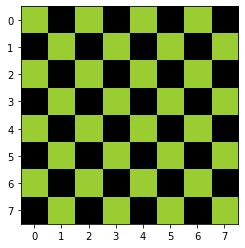

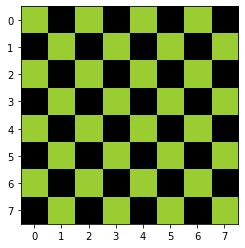

In [37]:
a = np.zeros((8, 8, 3), dtype=np.uint8)
yellow_green = [154, 205, 50]
a[::2, ::2] = yellow_green
a[1::2, 1::2] = yellow_green
plt.imshow(a)
plt.xticks(range(8))
plt.yticks(range(8));

Vẽ hình như bên dưới với background là màu silver (192,192,192) và foreground là màu gold (184,134,11).
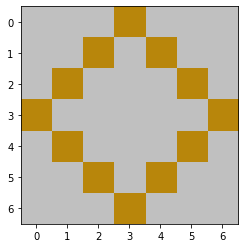

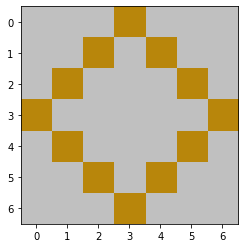

In [38]:
a = np.zeros((7, 7, 3), dtype=np.uint8)
gold = [184, 134, 11]
silver = [192, 192, 192]
a[:, :] = silver
a[range(3, -1, -1), range(0, 4, 1)] = gold
a[range(0, 4, 1), range(3, 7, 1)] = gold
a[range(3, 7, 1), range(0, 4, 1)] = gold
a[range(3, 7, 1), range(6, 2, -1)] = gold
plt.imshow(a)
plt.xticks(range(7))
plt.yticks(range(7));

## Tính toán trên Numpy array 

Để sử dụng Numpy hiệu quả thì thay đổi cách tư duy: cần suy nghĩ về <font color=blue>các thao tác tính toán trên nguyên mảng</font> mà Numpy đã cung cấp, chứ không phải là các thao tác tính toán trên từng con số

Hầu hết mọi thao tác tính toán trên mảng mà ta có thể nghĩ tới thì đều đã được Numpy cung cấp:

`+`, `np.add`\
`-`, `np.subtract`\
`-`, `np.negative`\
`*`, `np.multiply`\
`@`, `np.dot`\
`/`, `np.divide`\
`//`, `np.floor_divide`\
`**`, `np.power`\
`%`, `np.mod`\
`np.abs`\
`np.exp`\
`np.log`\
...

`==`, `np.equal`\
`<`, `np.less`\
`>`, `np.greater`\
`!=`, `np.not_equal`\
`<=`, `np.less_equal`\
`>=`, `np.greater_equal`\
`&`, `np.bitwise_and`\
`|`, `np.bitwise_or`\
`~`, `np.bitwise_not`\
`np.nonzero`\
`np.any`\
`np.all`\
...

`np.sum`\
`np.prod`\
`np.min`\
`np.max`\
`np.argmin`\
`np.argmax`\
...

`np.mean`\
`np.std`\
`np.percentile`\
`np.histogram`\
`np.unique`\
`np.sort`\
`np.argsort`\
...

Với một tính toán nào đó trên Numpy array, ngoài dạng hàm (hoặc toán tử) thì thường ta cũng có thể gọi phương thức tương đương từ Numpy array \
$\to$ Giúp đáp ứng các "khẩu vị code" khác nhau của người dùng

In [39]:
# Tính min, max của mỗi cột điểm
# để xem có gì bất thường không
print(np.min(p4ds_grades, axis=0))
print(np.max(p4ds_grades, axis=0))

[0. 0. 0. 0.]
[10. 10. 10. 10.]


In [40]:
# Tính cột điểm tổng kết
avg_grades = (p4ds_grades[:, 0] * 0.5 / 3 
              + p4ds_grades[:, 1] * 0.5 / 3
              + p4ds_grades[:, 2] * 0.5 / 3
              + p4ds_grades[:, 3] * 0.5)
avg_grades

array([ 0.25      ,  9.75      ,  8.20833333,  8.89166667,  9.41666667,
        9.25      ,  9.45833333,  9.36666667,  9.35      ,  8.93333333,
        8.44166667,  9.        ,  7.54166667,  8.875     ,  9.125     ,
       10.        ,  2.79166667,  9.48333333,  9.325     ,  9.45833333,
        9.83333333,  9.95833333,  7.33333333,  9.66666667,  8.66666667,
        9.35833333,  8.75      ,  9.625     ,  8.35833333,  6.41666667,
        9.16666667,  9.33333333,  8.39166667,  8.5       ,  8.25      ,
        6.34166667,  8.125     ,  8.24166667,  5.875     ,  8.13333333,
        9.5       ,  9.        , 10.        ,  7.51666667,  8.91666667])

In [41]:
# Tỉ lệ SV rớt môn là bao nhiêu?
# np.sum(avg_grades < 5) / len(avg_grades)
np.mean(avg_grades < 5)

0.044444444444444446